In [1]:
!python --version

Python 3.10.12


In [2]:
# If executed from Google Colab
# !git clone https://github.com/jesusBV20/MRS-SS_souce_seeking.git
# !rsync -a MRS-SS_souce_seeking/ .
# !rm -r MRS-SS_souce_seeking

Cloning into 'MRS-SS_souce_seeking'...
remote: Enumerating objects: 7, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 7 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (7/7), 13.25 KiB | 4.42 MiB/s, done.


In [ ]:
# If you want to use latex with matplotlib
# !apt install -y texlive texlive-latex-extra texlive-fonts-recommended dvipng cm-super
# !pip install -y latex

# Libraries and global variables

In [1]:
# ----------------------------------------------------------------------
# Import main libraries
# ----------------------------------------------------------------------

import numpy as np
from numpy import linalg as la

# Graphic tools
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import matplotlib

# Animation tools
from matplotlib.animation import FuncAnimation, FFMpegWriter
from IPython.display import HTML

# Source Seeking Tools
from SS_tools.toolbox import *
from SS_tools.scalar_field import *

from SS_tools.simulations import *
from SS_tools.plot_tools import *

# ----------------------------------------------------------------------
# General configuration
# ----------------------------------------------------------------------

# Fix the random seed
np.random.seed(2023)

# Tell matplotlib to use latex
matplotlib.rcParams['ps.useafm'] = True
matplotlib.rcParams['pdf.use14corefonts'] = True
matplotlib.rcParams['text.usetex'] = False

# Fix font size
font_params = {'size' : 14}
matplotlib.rc('font', **font_params)

---
# The Ascending Direction

## Lemma 1: 

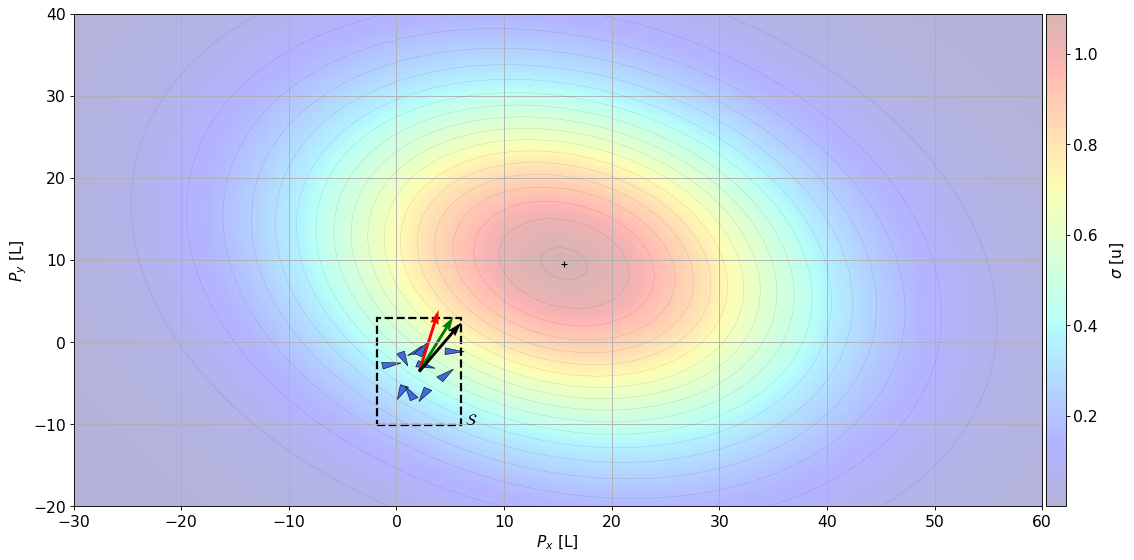

In [24]:
"""
Function to plot the S region
"""
def plot_sregion(ax,pc,l1,l2):
    l1_, l2_ = 1.3*l1, 1.3*l2
    p_rect = pc - np.array([l1_,l2_])/2

    ax.add_patch(Rectangle(p_rect, l1_, l2_, 
                           fill = False, lw=2, linestyle="--"))
    ax.text(p_rect[0] + 1.05*l1_, p_rect[1], r"$\mathcal{S}$")


# ----------------------------------------------------------------------
# Generating the scalar field
# ----------------------------------------------------------------------
mu0 = np.array([16,10]) 

max_int = 100
mu = mu0 + 6 * (np.random.rand() - 0.5)
dev = 40 + 20 * (np.random.rand() - 0.5)

psi = np.pi * np.random.rand()
a, b = 1 + 5*(np.random.rand()+1), 1 + 3*(np.random.rand()+1)

# Generate the scalar field
S = -np.array([[a,0],[0,b]])
R =  M_rot(psi)
R2 = M_rot(psi)

sigma_func = sigma_gauss(mu=mu, max_intensity=max_int, dev=dev, S=S, R=R)
sigma_test = sigma(sigma_func)
sigma_test.rot = R2

# ----------------------------------------------------------------------
# Generate the formation
# ----------------------------------------------------------------------
N = 10
l1, l2 = 6, 10

phi = 2 * np.pi * np.random.rand(N)
pc = mu0 + 40 * (np.random.rand(2) - 0.5)
px = pc[0] + l1 * (np.random.rand(N) - 0.5)
py = pc[1] + l2 * (np.random.rand(N) - 0.5)
P = np.array([px,py]).T

# Compute L_sigma
l_sigma = L_sigma(P - pc, sigma_test.value(P))
l_sigma = l_sigma/np.sqrt(l_sigma[0]**2 + l_sigma[1]**2)

# Compute L_sigma^1
l1_vec = sigma_test.draw_L1(pc, P)
l1_vec = l1_vec/np.sqrt(l1_vec[0]**2 + l1_vec[1]**2)

# ----------------------------------------------------------------------
# Plotting
# ----------------------------------------------------------------------
# Generate the plot
fig = plt.figure(figsize=(16, 8), dpi=80)
ax = fig.subplots()

# Draw the scalar field
sigma_test.draw(fig=fig, ax=ax, xlim=60, ylim=40, n=300, contour_levels=20)

# Axis configuration
ax.set_xlim([-30,60])
ax.set_ylim([-20,40])
ax.set_xlabel(r"$P_x$ [L]")
ax.set_ylabel(r"$P_y$ [L]")
ax.grid(True)

# Draw the agents
for n in range(N):
    icon = unicycle_patch([px[n], py[n]], phi[n], "royalblue", **KW_PATCH)
    ax.add_patch(icon)

# Plot S region
plot_sregion(ax,pc,l1,l2)

# Draw the gradient at pc, L^1 and L
sigma_test.draw_grad(pc, ax, width=0.003, scale=15)
ax.quiver(pc[0], pc[1], l_sigma[0], l_sigma[1], width=0.003, scale=15, color="red")
ax.quiver(pc[0], pc[1], l1_vec[0], l1_vec[1], width=0.003, scale=15, color="green")



plt.show()

In [90]:
# ----------------------------------------------------------------------
# Generating the scalar field
# ----------------------------------------------------------------------
n = 2
max_int = 100
mu = np.array([40,40]) * (np.random.rand()/2 + 0.5)
dev = 10 * (np.random.rand()/2 + 0.5)

sigma_func = sigma_gauss(mu=mu, max_intensity=max_int, dev=dev)
sigma_field = sigma(sigma_func)

# Grad, L, L1



# Dibujar S



## Collorary 1:

In [ ]:
# Figura de los clusters, visualizar L y gradiente



# Sensibility and Observability

## Proposition 2

## Lemma 4

## Proposition 3

## Proposition 4

## Proposition 5-6

## Batman

# Displacement-based formation control

---
# Source Seeking Simulations

## Simulation Class 1: *Un único cluster que modifica su forma y número de agentes*

Caracterísitcas de la misión:

* Contamos con un único enjambre.
* Podremos generar N agentes distribuidos de distintas formas entorno a un centroide.
* El enjambre podrá modificar su forma a lo largo de la simulación.
* Se podrán añadir y eliminar agentes del enjambre durange la simulación. #TODO

### **SIM 1**: N = 200 | Unos agentes mueren y otros se incorporan

In [2]:
# ----------------------------------------------------------------------
# Generating the scalar field
# ----------------------------------------------------------------------
n = 2
max_int = 20
mu = [40,40]
dev = 10

sigma_func = sigma_nonconvex(k=0.04, dev=dev, mu=mu)
sigma_field = sigma(sigma_func)

# ----------------------------------------------------------------------
# Simulation parameters
# ----------------------------------------------------------------------
dt = 0.1
t0 = 0
t_sim_final = 60

# Number of agents and initial states of the agents
n_agents = 200
rc0 = [-35, -50]
lims = [10, 5]
border_noise = 0.6

n_new = 15
rc0_new  = [10, -20]
lims_new = [10 , 0.5]

p0_new = XY_distrib(n_new, n, rc0_new, lims_new)
p0 = XY_distrib(n_agents - n_new, n, rc0, lims, border_noise)
p0 = np.vstack((p0_new, p0))
v0 = 3

active0 = np.ones(n_agents, dtype=bool)
active0[0:n_new] = False

In [3]:
# ----------------------------------------------------------------------
# Simulación numérica
# ----------------------------------------------------------------------

# Inicializamos la simulación
sim = simulation_class1(sigma_field, n_agents, [t0, p0, v0, active0], dt)

# Initialize the data collector
data_labels = ["pf", "rc", "e", "d", "sigma", "active", "l_sigma", 
               "rc_grad", "field_rot"]
data_col = data_collector(sim, data_labels)
data_col.collect()

# Configuración de la conexión y desconexión
t1 = 20
act_distance = np.ones(n_new+1) * 13 + (np.random.rand(n_new+1) - 0.5)*2

# Realizamos toda la simulación mumerica
while (data_col.get("tf") < t_sim_final - dt/10): # - dt/10 to avoid round-off errors

  # Desconexión de 20 agentes
  if (data_col.get("tf") >= t1) and (data_col.get("tf") <= t1+1):
    sim.active[n_new+1 : n_new+22] = False

  # Activación de agentes
  for i in range(n_new+1):
    if (data_col.get("d")[-1,i] <= act_distance[i]) and not sim.active[i]:
      sim.active[i] = True

  # Integrate new step
  sim.int_step()
  data_col.collect()

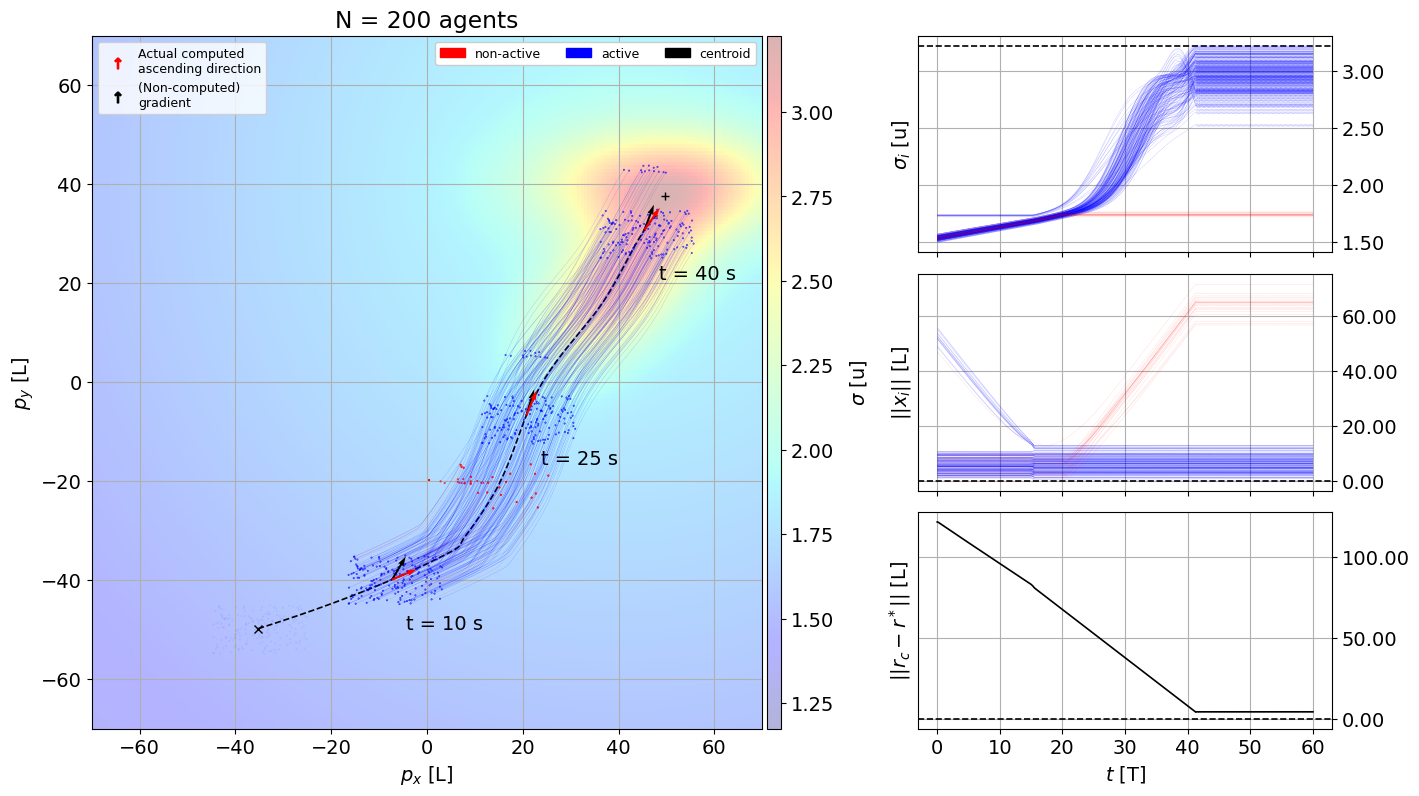

In [4]:
# ----------------------------------------------------------------------
# Plot few steps of the simulation
# ----------------------------------------------------------------------
plot_class1(data_col, sim, t_list=[10,25,40])

In [5]:
# ----------------------------------------------------------------------
# Animate the simulation
# ----------------------------------------------------------------------
anim = anim_class1(data_col, sim, anim_tf=1)
HTML(anim.to_html5_video()) # It takes a looot of time...

Simulando 11 frames... 
Estado:
tf =  0.00 | 0.00%
tf =  0.00 | 0.00%
tf =  0.10 | 10.00%
tf =  0.20 | 20.00%
tf =  0.30 | 30.00%
tf =  0.40 | 40.00%
tf =  0.50 | 50.00%
tf =  0.60 | 60.00%
tf =  0.70 | 70.00%
tf =  0.80 | 80.00%
tf =  0.90 | 90.00%
tf =  1.00 | 100.00%


### **SIM 2**: N = 200 | La formación cambia para evitar un obstáculo

In [6]:
# ----------------------------------------------------------------------
# Generamos el campo escalar
# ----------------------------------------------------------------------
n = 2
max_int = 20
mu = [40,40]
dev = 10

sigma_func  = sigma_gauss(mu, max_intensity=max_int, dev=dev, n=n)
sigma_field = sigma(sigma_func)

# ----------------------------------------------------------------------
# Parámetros de la simulación
# ----------------------------------------------------------------------
dt = 0.1
t0 = 0
t_sim_final = 105

# Obstáculos de la simulación
obstacles = [[0,5,10], [10,-30,5]]

# Estado inicial de los agentes y número de agentes
n_agents = 200
rc0 = [-35, -50]
r, h = 10, 2
lims = [15, 2]
border_noise = 0.6

p0_cir = circular_distrib(n_agents, n, [0,0], r, h, border_noise)
p0_sqr = XY_distrib(n_agents, n, [0,0], lims, border_noise)

p0 = rc0 + p0_cir
v0 = 1.5

In [7]:
# ----------------------------------------------------------------------
# Numerical simulation
# ----------------------------------------------------------------------

# Initialize the simulation
sim = simulation_class1(sigma_field, n_agents, [t0, p0, v0], dt, True, obstacles)

# Initialize the data collector
data_labels = ["pf", "rc", "e", "d", "sigma", "active", "l_sigma", 
               "rc_grad", "field_rot"]
data_col = data_collector(sim, data_labels)
data_col.collect()

# Execute numerical simulation
t1, t2 = 20, 43
while (sim.tf <= t_sim_final - dt/10):
  if (sim.tf >= t1) and (sim.tf <=t1+1):
    sim.Xd = p0_sqr
  if (sim.tf >= t2) and (sim.tf <=t2+1):
    sim.Xd = p0_cir

  # Integrate new step
  sim.int_step()
  data_col.collect()

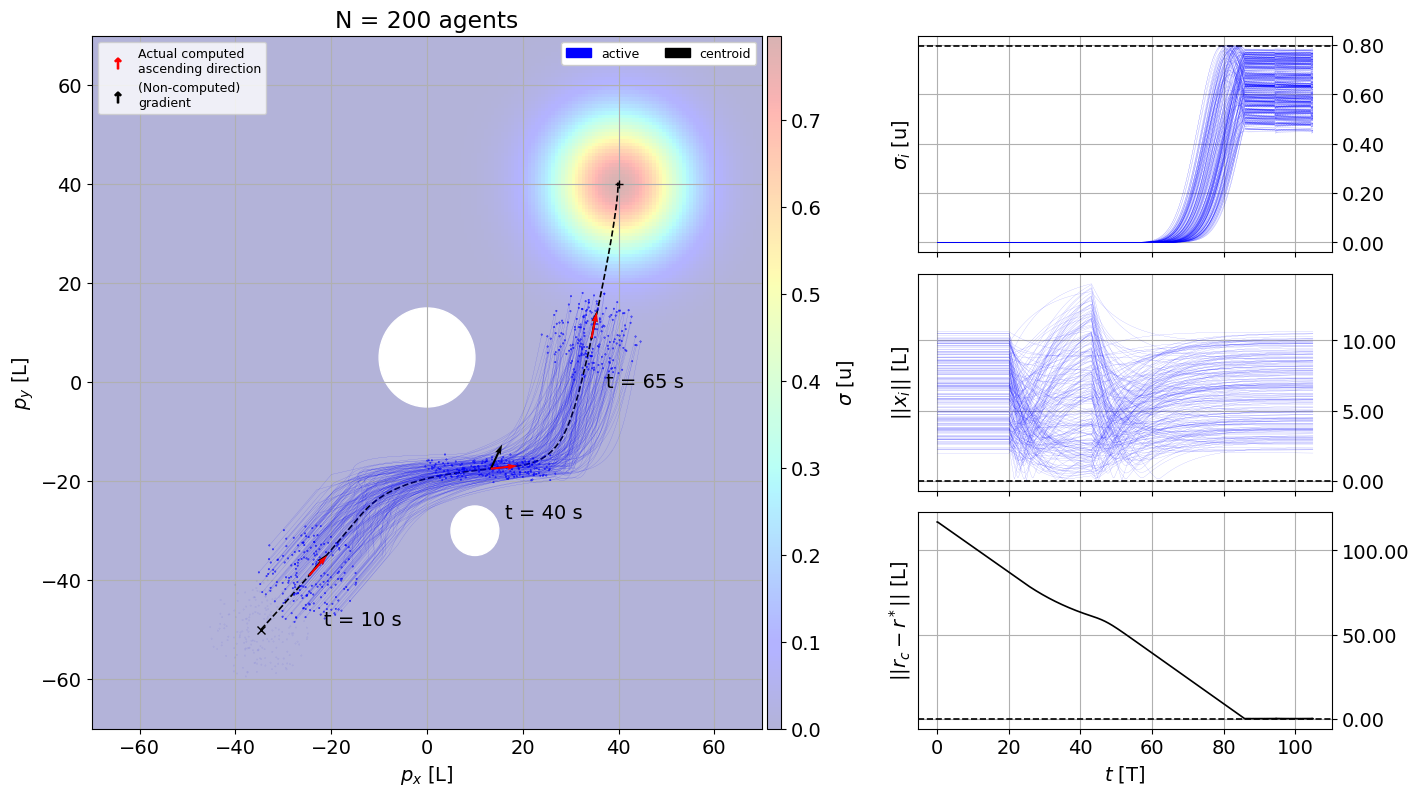

In [19]:
# ----------------------------------------------------------------------
# Plot few steps of the simulation
# ----------------------------------------------------------------------
plot_class1(data_col, sim, t_list=[10,40,65])

In [20]:
# ----------------------------------------------------------------------
# Animate the simulation
# ----------------------------------------------------------------------
anim = anim_class1(data_col, sim, anim_tf=90)
HTML(anim.to_html5_video()) # It takes a looot of time...

Simulando 901 frames... 
Estado:
tf =  0.00 | 0.00%
tf =  0.00 | 0.00%
tf =  9.00 | 10.00%
tf = 18.00 | 20.00%
tf = 27.00 | 30.00%
tf = 36.00 | 40.00%
tf = 45.00 | 50.00%
tf = 54.00 | 60.00%
tf = 63.00 | 70.00%
tf = 72.00 | 80.00%
tf = 81.00 | 90.00%
tf = 90.00 | 100.00%


### **SIM 3**: N = 200 | El enjambre rectangular rota
Una aproximación de Source Seeking a la maniobrabilidad de enjambres.

In [11]:
# ----------------------------------------------------------------------
# Maneuverability parameters
# ----------------------------------------------------------------------
limx, limy = 10, 2
psi = 45 * np.pi / 180
ab_ = 4

mu = [40,40]

# ----------------------------------------------------------------------
# Scalar field generation
# ----------------------------------------------------------------------
n = 2
max_int = 20
dev = 10

# Define the scalar field
S = -np.array([[1,0],[0,ab_]])
R = M_rot(psi)

sigma_func = sigma_gauss(mu=mu, max_intensity=max_int, dev=dev, S=S, R=R)
sigma_field = sigma(sigma_func)

# ----------------------------------------------------------------------
# Simulation parameters
# ----------------------------------------------------------------------
dt = 0.1
t0 = 0
t_sim_final = 100
n_agents = 200

# Generate different distributions
rc0 = [-35, -50]
border_noise = 0.6
lims = [limx, limy]
R45 = M_rot(-45 * np.pi/180)
R90 = M_rot(-90 * np.pi/180)

p1 = XY_distrib(n_agents, n, [0,0], lims, border_noise)
p2 = Q_prod_xi(R45,p1)
p3 = Q_prod_xi(R90,p1)

# Initial state of the agents and number of agent
p0 = rc0 + p2
v0 = 2

In [12]:
# ----------------------------------------------------------------------
# Numerical simulation
# ----------------------------------------------------------------------

# Initialize the simulation
sim = simulation_class1(sigma_field, n_agents, [t0, p0, v0], dt, True)

# Initialize the data collector
data_labels = ["pf", "rc", "e", "d", "sigma", "active", "l_sigma", 
               "rc_grad", "field_rot"]
data_col = data_collector(sim, data_labels)
data_col.collect()

# Execute numerical simulation
t1, t2 = 10, 30
while (sim.tf <= t_sim_final - dt/10):
  if (sim.tf >= t1) and (sim.tf <= t1+1):
    sim.Xd = p1
  if (sim.tf >= t2) and (sim.tf <= t2+1):
    sim.Xd = p3

  # Integrate new step
  sim.int_step()
  data_col.collect()

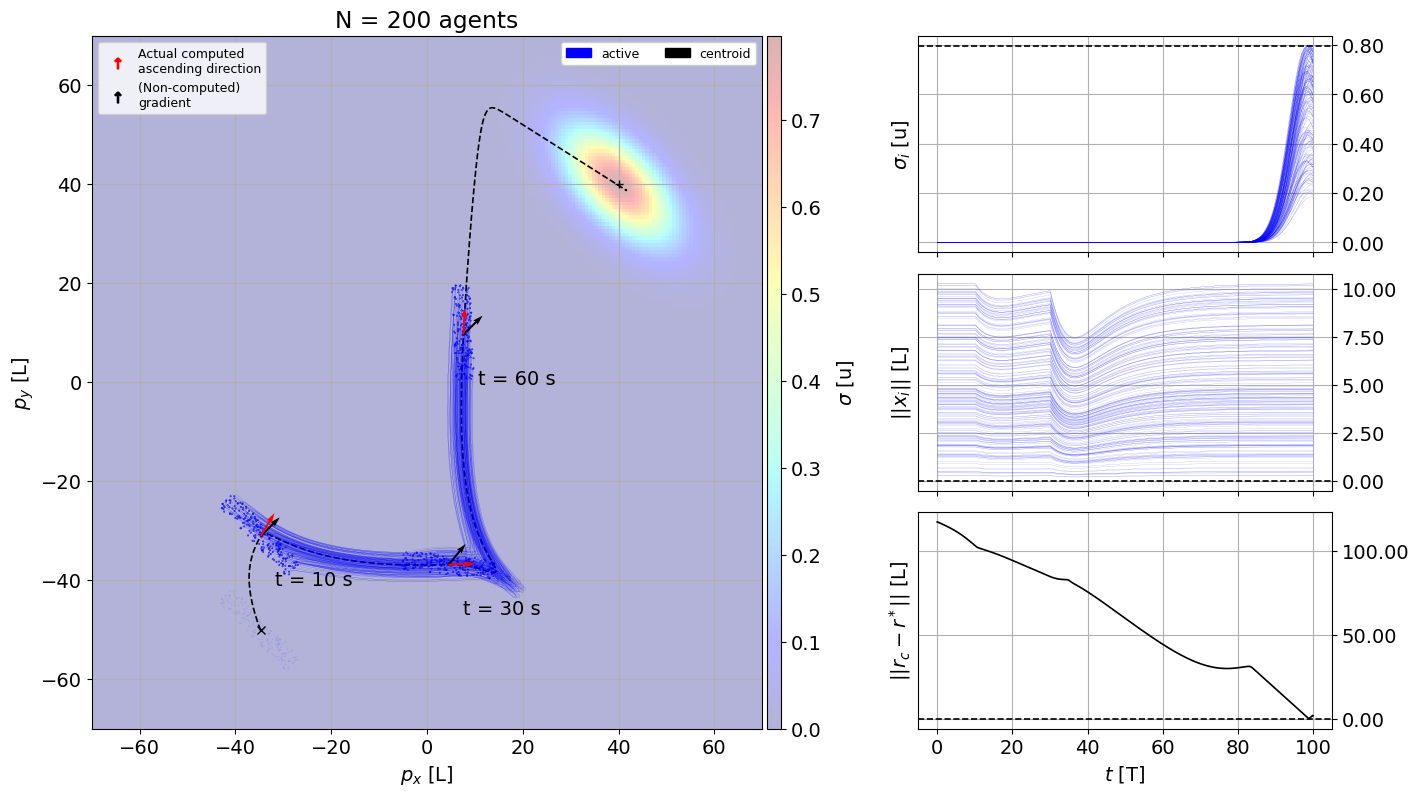

In [13]:
# ----------------------------------------------------------------------
# Plot few steps of the simulation
# ----------------------------------------------------------------------
plot_class1(data_col, sim, t_list=[10,30,60])

In [14]:
# ----------------------------------------------------------------------
# Animate the simulation
# ----------------------------------------------------------------------
anim = anim_class1(data_col, sim, anim_tf=100)
HTML(anim.to_html5_video()) # It takes a looot of time...

Simulando 1001 frames... 
Estado:
tf =  0.00 | 0.00%
tf =  0.00 | 0.00%
tf = 10.00 | 10.00%
tf = 20.00 | 20.00%
tf = 30.00 | 30.00%
tf = 40.00 | 40.00%
tf = 50.00 | 50.00%
tf = 60.00 | 60.00%
tf = 70.00 | 70.00%
tf = 80.00 | 80.00%
tf = 90.00 | 90.00%
tf = 100.00 | 100.00%


### **SIM 4**: N = 200 | El campo escalar rota
Una aproximación de Source Seeking a la maniobrabilidad de enjambres.

In [5]:
# Parámetros de maniobrabilidad
limx, limy = 10, 10
psi = -45 * np.pi / 180
ab_ = 4

mu = [40,40]

# ----------------------------------------------------------------------
# Generación del  campo escalar
# ----------------------------------------------------------------------
n = 2
max_int = 20
dev = 10

# Definimos el campo escalar
S = -np.array([[1,0],[0,ab_]])
R = M_rot(psi)

sigma_func = sigma_gauss(mu=mu, max_intensity=max_int, dev=dev, S=S, R=R)
sigma_field = sigma(sigma_func)

# ----------------------------------------------------------------------
# Parámetros de la simulación
# ----------------------------------------------------------------------
dt = 0.1
t0 = 0
t_sim_final = 60
n_agents = 150

# Generamos distintas distribuciones
rc0 = [-35, -50]
border_noise = 0.6
lims = [limx, limy]

p1 = XY_distrib(n_agents, n, [0,0], lims, border_noise)
p1 = batman_distrib(n_agents, [0,0], lims)

# Estado inicial de los agentes y número de agentes
p0 = rc0 + p1
v0 = 4

g:\Mi unidad\Workspace\source_seeking\MRS-SS_souce_seeking\SS_tools\toolbox.py:215: RuntimeWarning: invalid value encountered in sqrt
  eq1 = lambda x,y: ((x/7)**2 * np.sqrt(abs(abs(x)-3)/(abs(x)-3)) + (y/3)**2 * np.sqrt(abs(y+3/7*np.sqrt(33))/(y+3/7*np.sqrt(33))) - 1)
g:\Mi unidad\Workspace\source_seeking\MRS-SS_souce_seeking\SS_tools\toolbox.py:218: RuntimeWarning: invalid value encountered in sqrt
  eq4 = lambda x,y: (3*abs(x) + .75 * np.sqrt(abs((abs(x)-.75)*(abs(x)-.5)) / ((.75-abs(x))*(abs(x)-.5))) - y )


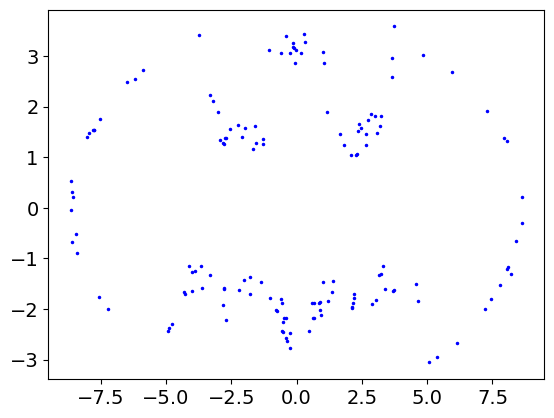

In [6]:
# Plot batman distribution :)
plt.plot(p1[:,0], p1[:,1], ".b", markersize=3)
plt.show()

In [8]:
# ----------------------------------------------------------------------
# Numerical simulation
# ----------------------------------------------------------------------

# Initialize the simulation
sim = simulation_class1(sigma_field, n_agents, [t0, p0, v0], dt, True)

# Initialize the data collector
data_labels = ["pf", "rc", "e", "d", "sigma", "active", "l_sigma", 
               "rc_grad", "field_rot"]
data_col = data_collector(sim, data_labels)
data_col.collect()

# Execute numerical simulation
w1 = 0.2  # Velocidad angular del campo escalar (rad/s)
w2 = 0.1
t1, t2, t3, t4 = 10, 15, 25, 50
while (sim.tf <= t_sim_final - dt/10):
  if ((sim.tf >= t1) and (sim.tf < t2)):
    rot = w1*(sim.tf-t1)
    sim.sigma_field.rot = M_rot(rot)
  if ((sim.tf >= t3) and (sim.tf < t4)):
    sim.sigma_field.rot = M_rot(rot + w2*(sim.tf-t3))

  # Integrate new step
  sim.int_step()
  data_col.collect()

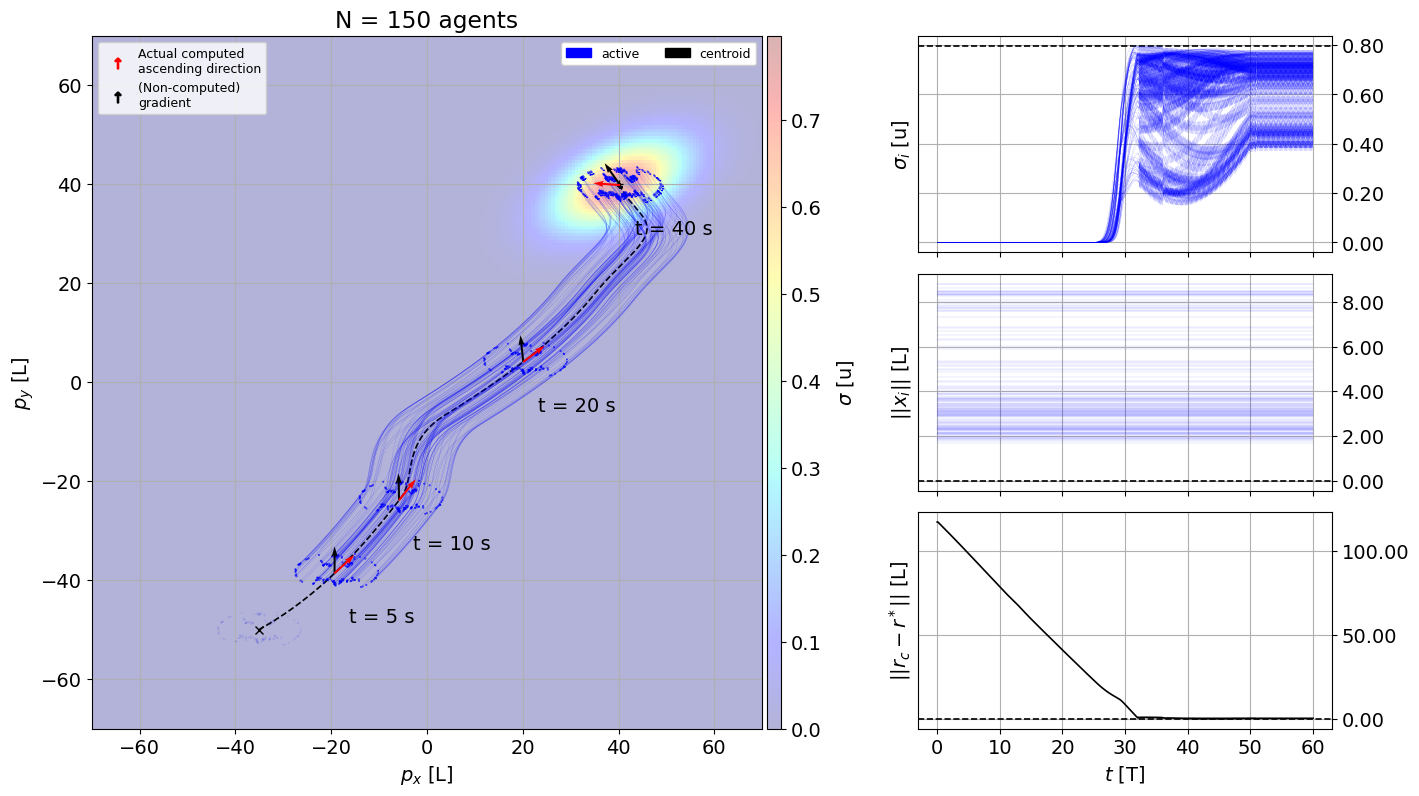

In [9]:
# ----------------------------------------------------------------------
# Plot few steps of the simulation
# ----------------------------------------------------------------------
plot_class1(data_col, sim, t_list=[5,10,20,40])

In [10]:
# ----------------------------------------------------------------------
# Animate the simulation
# ----------------------------------------------------------------------
anim = anim_class1(data_col, sim, anim_tf=35)
HTML(anim.to_html5_video()) # It takes a looot of time...

Simulando 351 frames... 
Estado:
tf =  0.00 | 0.00%
tf =  0.00 | 0.00%
tf =  3.50 | 10.00%
tf =  7.00 | 20.00%
tf = 10.50 | 30.00%
tf = 14.00 | 40.00%
tf = 17.50 | 50.00%
tf = 21.00 | 60.00%
tf = 24.50 | 70.00%
tf = 28.00 | 80.00%
tf = 31.50 | 90.00%
tf = 35.00 | 100.00%


## Simulation Class 2: Uniciclos en busca de la fuente

Similir a la simulación tipo 1, pero con dinámica de uniciclos

### **SIM 5**: Uniciclos en busca de la fuente

In [2]:
# ----------------------------------------------------------------------
# Generamos el campo escalar
# ----------------------------------------------------------------------
n = 2
max_int = 20
mu = [40,40]
dev = 10

sigma_func = sigma_nonconvex(k=0.04, dev=dev, mu=mu)
sigma_field = sigma(sigma_func)

# ----------------------------------------------------------------------
# Parámetros de la simulación
# ----------------------------------------------------------------------
dt = 0.2
t0 = 0
t_sim_final = 100

# Estado inicial de los agentes y número de agentes
n_agents = 20
rc0 = [-35, -50]
r, h = 10, 2
lims = [15, 2]
border_noise = 0.6

p0_cir = circular_distrib(n_agents, n, [0,0], r, h, border_noise)
p0_sqr = XY_distrib(n_agents, n, [0,0], lims, border_noise)

p0 = rc0 + p0_sqr
v0 = 2
phi0 = np.random.rand(n_agents) * np.pi

kd = 0.2

In [3]:
# ----------------------------------------------------------------------
# Numerical simulation
# ----------------------------------------------------------------------

# Initialize the simulation
sim = simulation_class2(sigma_field, n_agents, [t0, p0, v0, phi0], dt, kd)

# Initialize the data collector
data_labels = ["pf", "phif", "rc", "e", "d", "sigma", "omega", "l_sigma", "rc_grad"]
data_col = data_collector(sim, data_labels)
data_col.collect()

# Execute numerical simulation
while (sim.tf <= t_sim_final - dt/10):
  if (sim.tf >= 5) and (sim.tf <= 11):
    sim.Xd = p0_sqr

  # Integrate new step
  sim.int_step()
  data_col.collect()

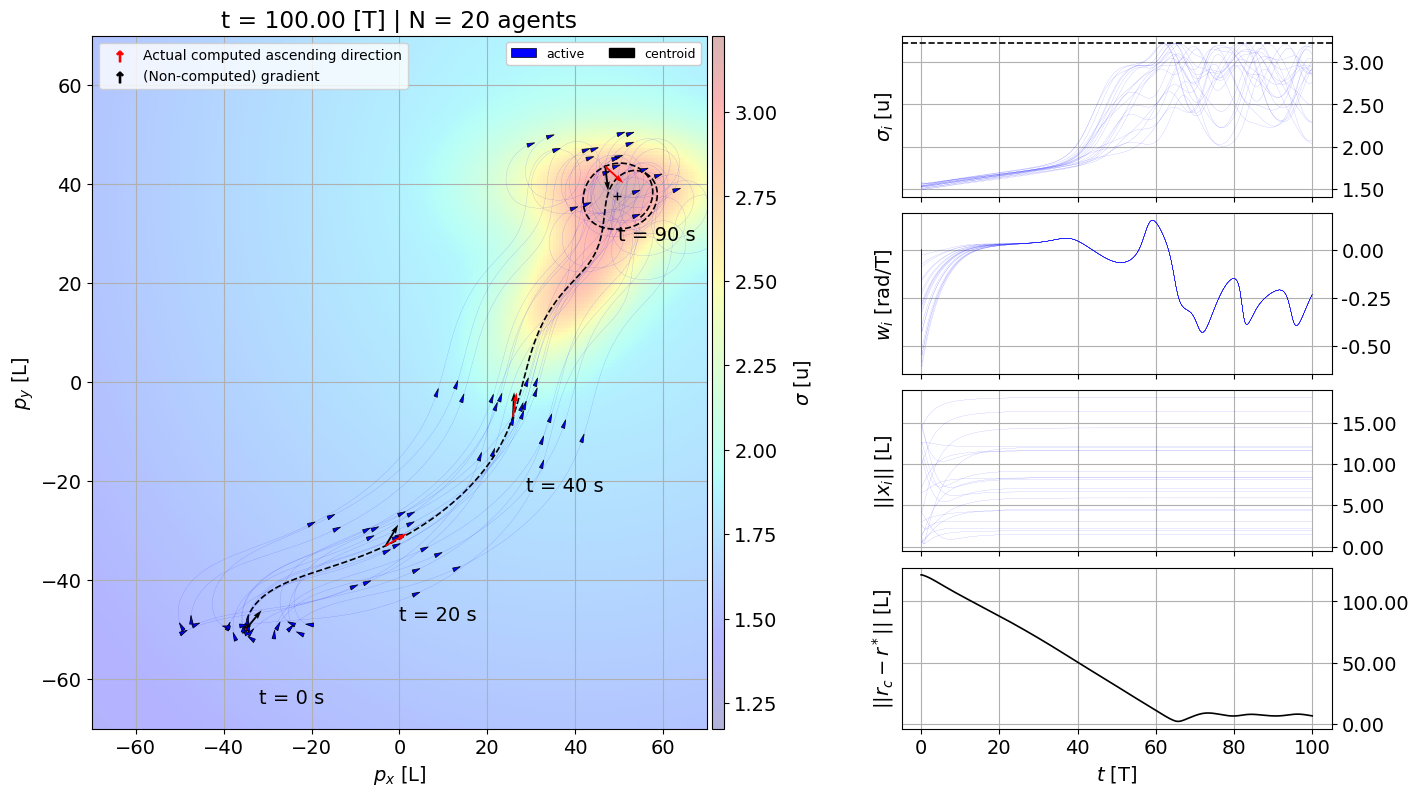

In [4]:
# ----------------------------------------------------------------------
# Plot few steps of the simulation
# ----------------------------------------------------------------------
plot_class2(data_col, sim, t_list=[0,20,40,90])

In [6]:
# ----------------------------------------------------------------------
# Animate the simulation
# ----------------------------------------------------------------------
anim = anim_class2(data_col, sim, anim_tf=90)
HTML(anim.to_html5_video()) # It takes a looot of time...

Simulando 451 frames... 
Estado:
tf =  0.00 | 0.00%
tf =  0.00 | 0.00%
tf =  9.00 | 10.00%
tf = 18.00 | 20.00%
tf = 27.00 | 30.00%
tf = 36.00 | 40.00%
tf = 45.00 | 50.00%
tf = 54.00 | 60.00%
tf = 63.00 | 70.00%
tf = 72.00 | 80.00%
tf = 81.00 | 90.00%
tf = 90.00 | 100.00%


### SIM 7: Simulación inifinita, aparecen clusters que mueren al llegar a la fuente